In [2]:
#!pip install wordcloud

In [4]:
#!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [1]:
import numpy as np 
import pandas as pd 
import os
import itertools

#plots
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams


from sklearn import preprocessing
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

import re
from collections import Counter

In [14]:
yelp=pd.read_csv('yelp.csv')

In [13]:
yelp.head()

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Â...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11/1/2010,Snack is great place for a Â casual sit down l...,-1


In [4]:
print("Total number of records in data: ",len(yelp))

Total number of records in data:  359052


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359052 entries, 0 to 359051
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User_id     359052 non-null  int64 
 1   Product_id  359052 non-null  int64 
 2   Rating      359052 non-null  int64 
 3   Date        359052 non-null  object
 4   Review      359052 non-null  object
 5   Label       359052 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.4+ MB


In [6]:
#covid['user_location'].fillna('unknown', inplace=True)

In [7]:
#the count of tweets location wise
#covid['user_location'].value_counts()

In [8]:
#!pip install pycountry

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
var1 = yelp.groupby('Label').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
a=var1.style.background_gradient()
a

,Label,Review
1,1,322167
0,-1,36885


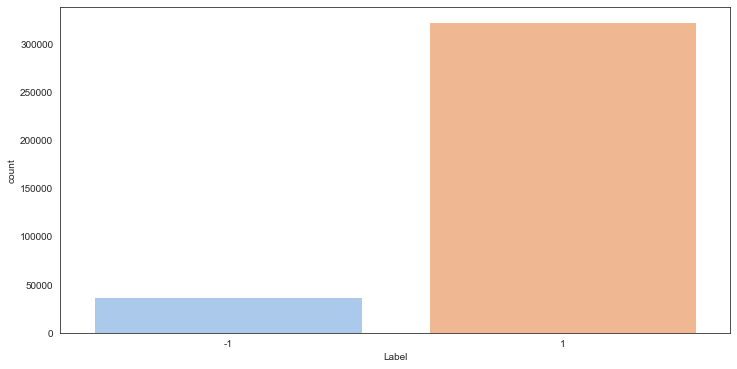

In [10]:
plt.figure(figsize=(12,6))
b=sns.countplot(x='Label',data=yelp,palette="pastel") #palette = flare or Set3
fig=b.get_figure()
#fig.savefig('1.png',dpi=300)

In [19]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [21]:
yelp['clean_text'] = yelp['Review'].apply(preprocess)
yelp['clean_joined_text']=yelp['clean_text'].apply(lambda x:" ".join(x))

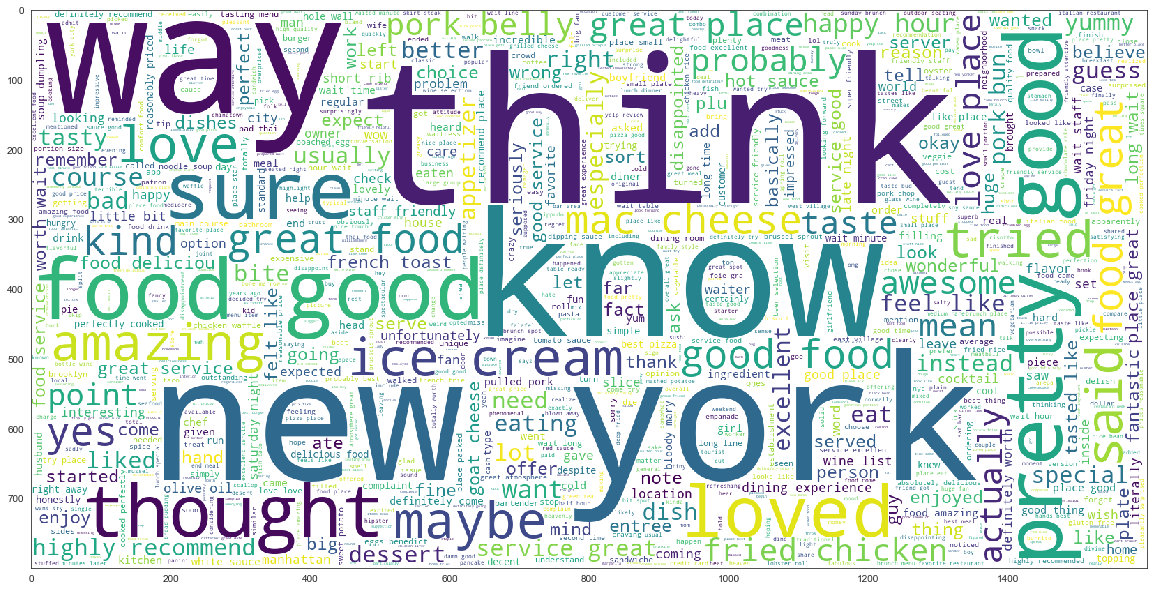

In [25]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , background_color='white', width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(yelp[yelp.Label == 1].clean_joined_text))
plt.imshow(wc) #, interpolation = 'bilinear'

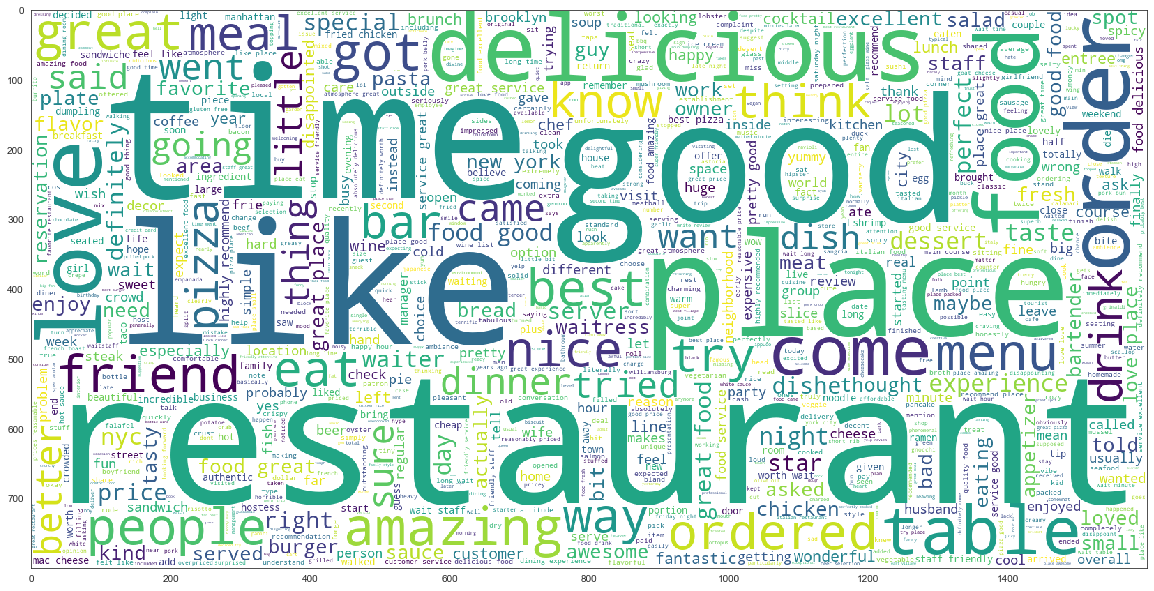

In [26]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , background_color='white', width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(yelp[yelp.Label == -1].clean_joined_text))
plt.imshow(wc) #, interpolation = 'bilinear'

In [14]:
# popular covid hashtags and most buzzing words in tweets using wordcloud
stopwords_ = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color='white',
        stopwords=stopwords_,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

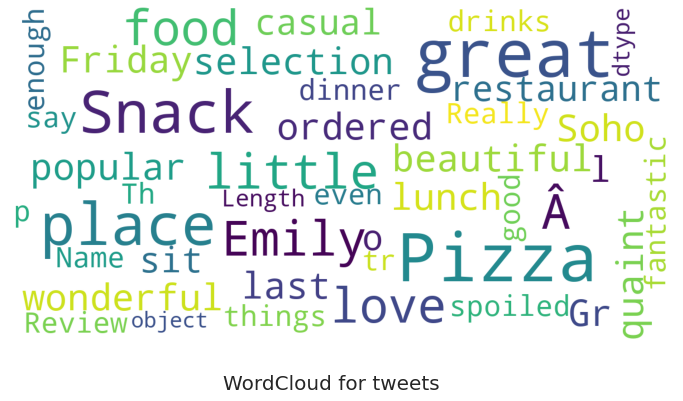

In [15]:
show_wordcloud(yelp['Review'], "WordCloud for tweets")

In [17]:
#top N-gram sequential words used in covid tweets (count vectorizer, bag of words, )
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['Review','count'])
    return df
unigram_df=ngram_df(yelp['Review'],(1,1),20)
bigram_df=ngram_df(yelp['Review'],(2,2),20)
trigram_df=ngram_df(yelp['Review'],(3,3),20)


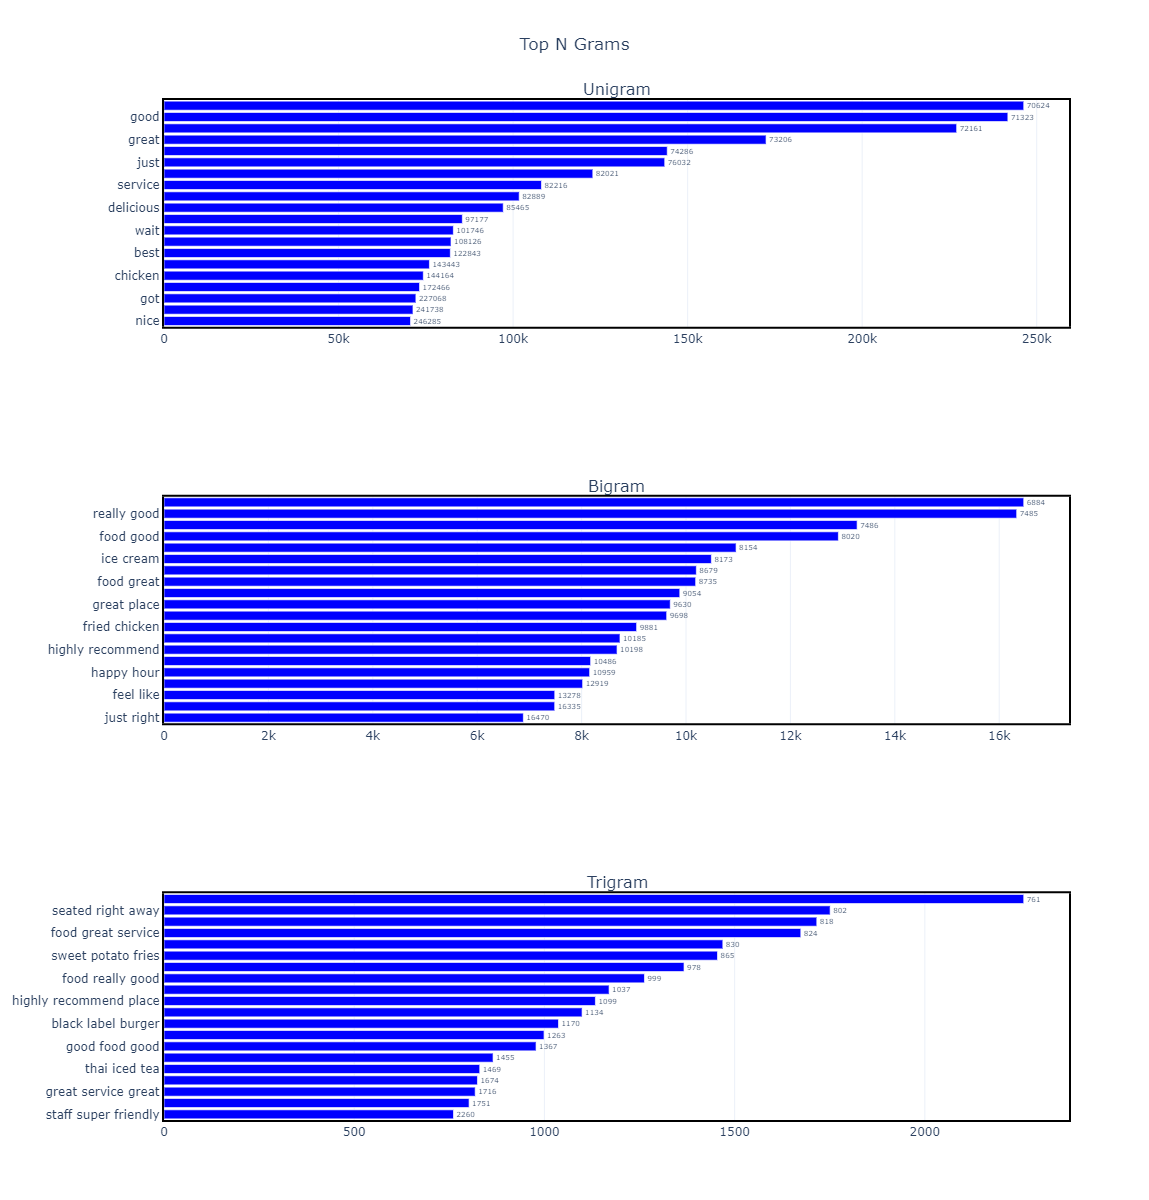

In [18]:
fig = make_subplots(
    rows=3, cols=1,subplot_titles=("Unigram","Bigram",'Trigram'),
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}]
          ])

fig.add_trace(go.Bar(
    y=unigram_df['Review'][::-1],
    x=unigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=unigram_df['count'],
    textposition = "outside",
    orientation="h",
    name="Months",
),row=1,col=1)

fig.add_trace(go.Bar(
    y=bigram_df['Review'][::-1],
    x=bigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=bigram_df['count'],
     name="Days",
    textposition = "outside",
    orientation="h",
),row=2,col=1)

fig.add_trace(go.Bar(
    y=trigram_df['Review'][::-1],
    x=trigram_df['count'][::-1],
    marker={'color': "blue"},  
    text=trigram_df['count'],
     name="Days",
    orientation="h",
    textposition = "outside",
),row=3,col=1)

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_layout(title_text='Top N Grams',xaxis_title=" ",yaxis_title=" ", showlegend=False,title_x=0.5,
                  height=1200,template="plotly_white")
fig.show()